# Seyed Mohammad Amin Atyabi - 830402014

# Linear Separability

**1**

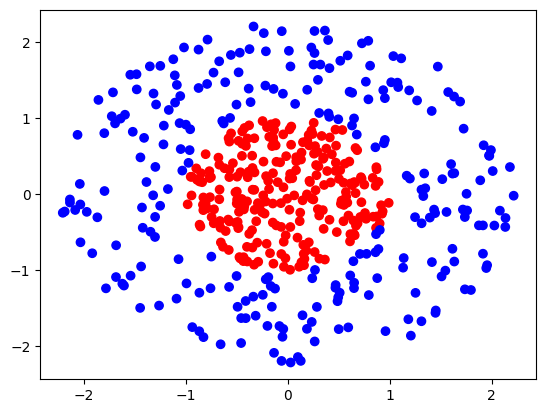

In [1]:
import numpy
from matplotlib import pyplot as plt


def random_point(radius, radius_start):
    alpha = 2 * numpy.pi * numpy.random.random()
    r = radius * numpy.sqrt(numpy.random.random() + (radius_start / 4))
    x = r * numpy.cos(alpha)
    y = r * numpy.sin(alpha)
    return x, y


color = {'r': 0.0, 'b': 1.0}

point_count = 250
X = []
Y = []
Z = []
for i in range(point_count):
    x, y = random_point(1, 0)
    X.append(x)
    Y.append(y)
    Z.append('r')

for i in range(point_count):
    x, y = random_point(2, 1)
    X.append(x)
    Y.append(y)
    Z.append('b')

data = numpy.array([X, Y])
Z = numpy.array(Z)

plt.scatter(data[0], data[1], color=Z)
plt.show()

**2**

Theta: [0.03184019 0.2171028  0.18041051]
Accuracy: 0.496


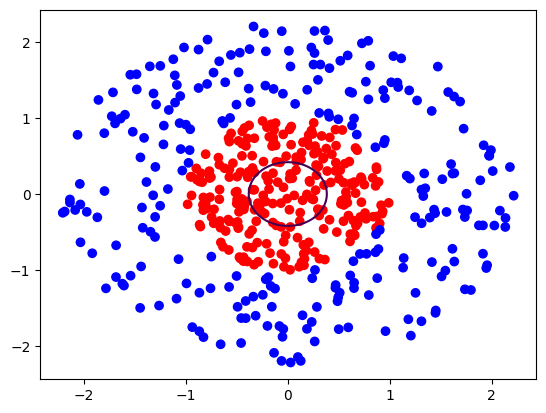

In [2]:
from sklearn.metrics import accuracy_score

label = Z.copy()
label[label == 'r'] = color['r']
label[label == 'b'] = color['b']
label = label.astype(float)


def sigmoid(x, theta):
    return 1 / (1 + numpy.exp(-numpy.dot(x, theta)))


def cost_function(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X, theta)
    loss = (-1 / m) * numpy.sum(y * numpy.log(h) + (1 - y) * numpy.log(1 - h))
    return loss


def gradient_descent(theta, X, y, learning_rate, iterations):
    m = X.shape[0]
    for _ in range(iterations):
        h = sigmoid(X, theta)
        error = h - y
        delta_theta = (1 / m) * numpy.dot(X.T, error)
        theta -= learning_rate * delta_theta
    return theta


theta = numpy.random.rand(3)

learning_rate = 0.01
num_iterations = 1000

data = numpy.array([numpy.full(shape=500, fill_value=1, dtype=int), data[0], data[1]]).transpose()

theta = gradient_descent(theta, data, label, learning_rate, num_iterations)
print(f'Theta: {theta}')

y_pred = numpy.round(sigmoid(data, theta))

accuracy = accuracy_score(label, y_pred)
print(f'Accuracy: {accuracy}')

plt.scatter(data.transpose()[1], data.transpose()[2], color=Z)

x = numpy.linspace(-2.0, 2.0, 1000)
y = numpy.linspace(-2.0, 2.0, 1000)
X, Y = numpy.meshgrid(x, y)
F = (theta[1] * (X ** 2)) + (theta[2] * (Y ** 2)) - theta[0]
plt.contour(X, Y, F, [0])
plt.show()

# Predict Car Price Using Linear Regression

**1**

In [3]:
import pandas

car_data = pandas.read_csv('data/car details v4.csv')

car_data['Engine'] = car_data['Engine'].str.replace(' cc', '')
car_data['Engine'] = pandas.to_numeric(car_data['Engine'], errors='coerce', downcast='integer')

pattern_pw = r'(\d+)(?:\s*bhp)?\s*@\s*(\d+)(?:\s*rpm)?'
car_data[['Power', 'Power RPM']] = car_data['Max Power'].str.extract(pattern_pw).astype(float)

pattern_trq = r'(\d+)(?:\s*Nm)?\s*@\s*(\d+)(?:\s*rpm)?'
car_data[['Torque', 'Torque RPM']] = car_data['Max Torque'].str.extract(pattern_trq).astype(float)

car_data = car_data.drop(columns=['Max Power', 'Max Torque'])

car_data.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM
count,2.059000e+03,2059.000000,2.059000e+03,1979.000000,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000,1975.000000,1975.000000,1979.000000,1979.000000
mean,1.702992e+06,2016.425449,5.422471e+04,1692.575543,4280.860652,1767.991980,1591.735338,5.306266,52.002210,129.538734,4835.093671,308.453765,2619.545225
std,2.419881e+06,3.363564,5.736172e+04,643.736294,442.458507,135.265825,136.073956,0.822170,15.110198,65.153364,1097.368548,675.608440,1206.314770
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000,7.000000,2910.000000,8.000000,150.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1197.000000,3985.000000,1695.000000,1485.000000,5.000000,41.250000,83.000000,4000.000000,115.000000,1600.000000
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000,116.000000,4200.000000,200.000000,1900.000000
75%,1.925000e+06,2019.000000,7.200000e+04,1995.000000,4629.000000,1831.500000,1675.000000,5.000000,60.000000,171.000000,6000.000000,350.000000,4000.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,660.000000,8250.000000,7619.000000,6500.000000


In [4]:
car_data['price_cat'] = numpy.select(
    [car_data['Price'] >= 1925000,
     car_data['Price'] <= 490000,
     car_data['Price'].between(490000, 825000),
     car_data['Price'].between(825000, 1925000)],
    ['0', '1', '2', '3'],
    numpy.nan
)

car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM,price_cat
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0,2
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0,1
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0,1
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0,2
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,330.0,1600.0,3
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0,1
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,3795.0,1680.0,1427.0,5.0,45.0,70.0,6250.0,102.0,4000.0,1
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,4936.0,1868.0,1479.0,5.0,65.0,188.0,4000.0,400.0,1750.0,0


In [5]:
from sklearn.model_selection import train_test_split

car_feature = car_data.drop(columns=['Price'])
car_price = car_data['Price']

x_train, y_train, x_test, y_test = train_test_split(car_feature, car_price, test_size=0.2, stratify=car_feature['price_cat'])

**2**

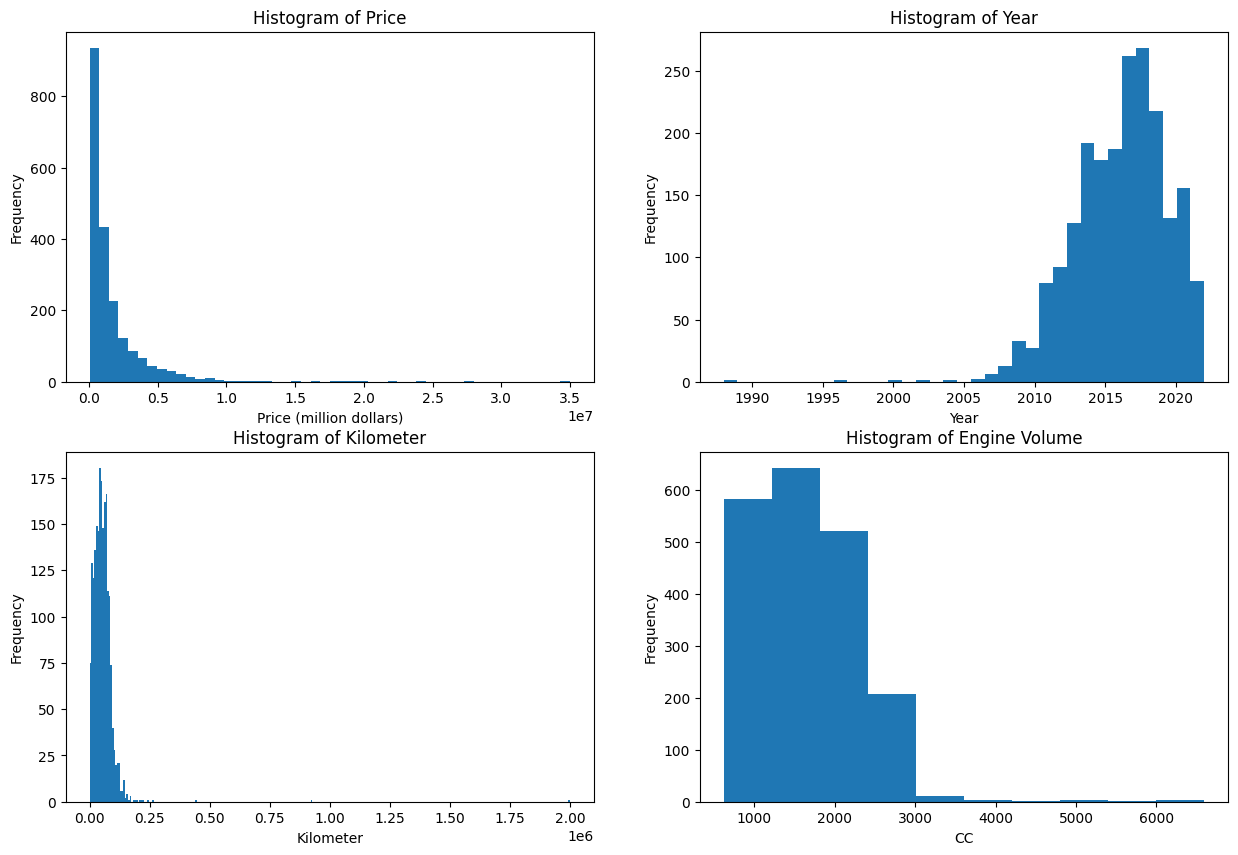

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(car_data['Price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price (million dollars)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(car_data['Year'], bins=35)
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(car_data['Kilometer'], bins=300)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(car_data['Engine'], bins=10)
plt.title('Histogram of Engine Volume')
plt.xlabel('CC')
plt.ylabel('Frequency')

plt.show()

In [20]:
car_model_mean_price = car_data.groupby(['Model'])['Price'].mean().astype(int).reset_index()
car_model_mean_price

,Model,Price
0,2 Series Gran Coupe 220d M Sport [2020-2021],4200000
1,3-Series 320d,800000
2,3-Series 320d Highline Sedan,1200000
3,3-Series 320d Luxury Edition,4550000
4,3-Series 320d Luxury Line,2534374
...,...,...
1045,i20 Magna 1.4 CRDI,340000
1046,i20 Sportz 1.2,375000
1047,i20 Sportz 1.2 (O),305000
1048,i20 Sportz 1.2 BS-IV,350000


**3**

In [7]:
print(car_data.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Power                  84
Power RPM              84
Torque                 80
Torque RPM             80
price_cat               0
dtype: int64


In [8]:
print(car_data.isnull().mean() * 100)

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
Power                 4.079650
Power RPM             4.079650
Torque                3.885381
Torque RPM            3.885381
price_cat             0.000000
dtype: float64


**4**

**5**

**6**

**7**

**8**